In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
from mlxtend.plotting import plot_decision_regions
ops.reset_default_graph()

# LOGISTIC REGRESSION

In this notebook we will apply logistic regression to a linearly separable dataset of two classes.

The notebook will help us to better understand logistic regression and why it can be perceived as a baby neural net.

The most important part of this notebook is to identify the ingredientes of logistic regression as well as to understand the mechanism logistic regression is using to classify the points.

## 1. Artificially create a linearly separable dataset with two classes.

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

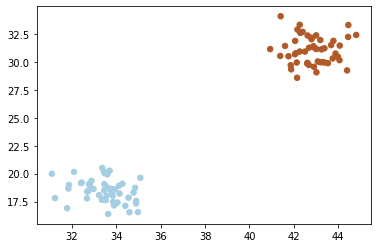

In [ ]:
# We randomly generate datapoints from two different gaussians.
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 50))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
y


## 2. Create the Logistic Regression Model Structure.

We will use keras to create our Logistic Regresson Model. Specifically we will use the class Sequential, where we can create a model layer by layer -- this would be specially interesting where working with neural nets.

There are different types of layers. We will use two in particular, the layer Input (just for holding our input vectors) and the Layer "Dense". A "Dense layer" indicates that the units of the layer are fully connected with the input layer units https://keras.io/api/layers/core_layers/dense/

For further information please have a look into the keras documentation

https://keras.io/api/layers/

In [ ]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=5, activation="relu", name="hidden"),
    layers.Dense(units=2, activation="softmax", name="output")
])

In [ ]:
# we can use the summary function to inspect the layers of our model 
my_first_neural_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 5)                 15        
                                                                 
 output (Dense)              (None, 2)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


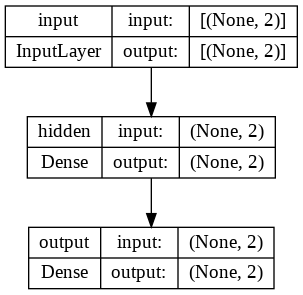

In [ ]:
tf.keras.utils.plot_model(my_first_neural_net, show_layer_names=True, show_shapes=True)

## 3. Compiling the model

Now that we have an structure we need to complete the model. So far, we have how the inputs and outputs will be and how they relate (through the mapping function/structure that we create).

Now we need the cost function to measure how well or bad we are doing the things and the learning procedure. We do this through the 'compile' function.

Also we include the kind of metric we want to assess. In this case "accuracy"


In [ ]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                                  loss= tf.keras.losses.sparse_categorical_crossentropy, 
                                  metrics=['accuracy'])

## 4. Training the model

The infamous fit! This basically will run our learning procedure (which it is iterative) over our training dataset, and evaluate over the validation one. 

In [ ]:
history = my_first_neural_net.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
4/4 - 0s - loss: 6.0815 - accuracy: 0.5500 - 245ms/epoch - 61ms/step
Epoch 2/200
4/4 - 0s - loss: 5.8277 - accuracy: 0.5300 - 11ms/epoch - 3ms/step
Epoch 3/200
4/4 - 0s - loss: 3.8164 - accuracy: 0.5600 - 11ms/epoch - 3ms/step
Epoch 4/200
4/4 - 0s - loss: 3.1975 - accuracy: 0.5200 - 10ms/epoch - 3ms/step
Epoch 5/200
4/4 - 0s - loss: 2.4476 - accuracy: 0.5100 - 10ms/epoch - 3ms/step
Epoch 6/200
4/4 - 0s - loss: 2.8099 - accuracy: 0.7200 - 11ms/epoch - 3ms/step
Epoch 7/200
4/4 - 0s - loss: 0.0826 - accuracy: 1.0000 - 10ms/epoch - 3ms/step
Epoch 8/200
4/4 - 0s - loss: 0.0907 - accuracy: 0.9900 - 11ms/epoch - 3ms/step
Epoch 9/200
4/4 - 0s - loss: 0.0796 - accuracy: 0.9900 - 10ms/epoch - 2ms/step
Epoch 10/200
4/4 - 0s - loss: 0.0716 - accuracy: 1.0000 - 14ms/epoch - 4ms/step
Epoch 11/200
4/4 - 0s - loss: 0.0794 - accuracy: 1.0000 - 11ms/epoch - 3ms/step
Epoch 12/200
4/4 - 0s - loss: 0.1310 - accuracy: 0.9400 - 11ms/epoch - 3ms/step
Epoch 13/200
4/4 - 0s - loss: 0.0754 - accuracy

## 6. Plot Decision Boundary

In [ ]:
test_results = my_first_neural_net.evaluate(X, y, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

4/4 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 1.0000
Test results - Loss: 0.01573372073471546 - Accuracy: 100.0%


In [ ]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [ ]:
my_first_neural_net_no_one = Onehot2Int(my_first_neural_net)

3888/3888 [==============================] - 5s 1ms/step


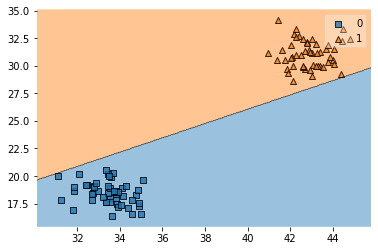

In [ ]:
plot_decision_regions(X, y, clf=my_first_neural_net_no_one)
plt.show()